In [2]:
import logging
import sys
sys.path.append('/remote/gpu02/crescenzo/MadMiner')
from madminer.sampling import combine_and_shuffle
from madminer.core import MadMiner
from madminer.ml import MorphParameterizedRatioEstimator
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.utils.interfaces import _load_samples
import matplotlib.pyplot as plt

In [3]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [14]:
for j in range(1,6):
    combine_and_shuffle([f"data/lhe_training_data_{j}.h5",f"data/lhe_training_data_0.h5"], f"data/lhe_data_training_{j}_shuffled.h5")

15:27 madminer.sampling.co WARNING Careful: this tool assumes that all samples are generated with the same setup, including identical benchmarks (and thus morphing setup), and identical nuisance parameters. If it is used with samples with different settings, there will be wrong results! There are no explicit cross checks in place yet.
15:27 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
15:27 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
15:27 madminer.utils.inter INFO    HDF5 file does not contain systematic information
15:27 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
15:27 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
15:27 madminer.utils.inter INFO    HDF5 file does not contain systematic information
15:27 madminer.sampling.co WARNING Careful: this tool assumes that all samples are generated with the same setup, includi

In [15]:
(_load_samples("data/lhe_data_training_5_shuffled.h5")[2])

array([0, 0, 0, ..., 5, 0, 0])

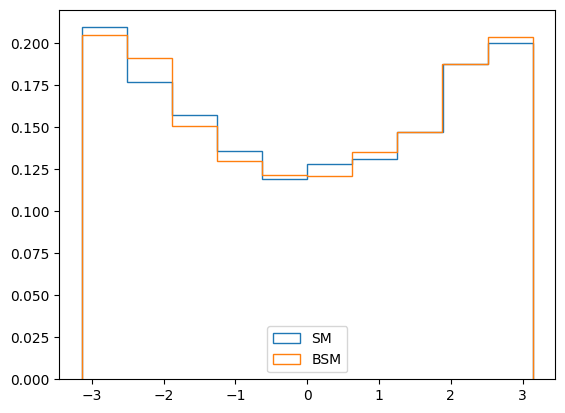

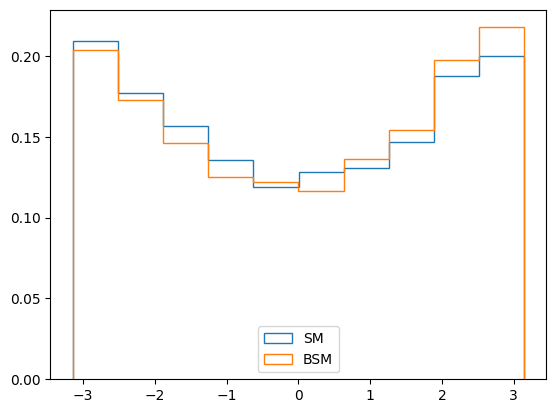

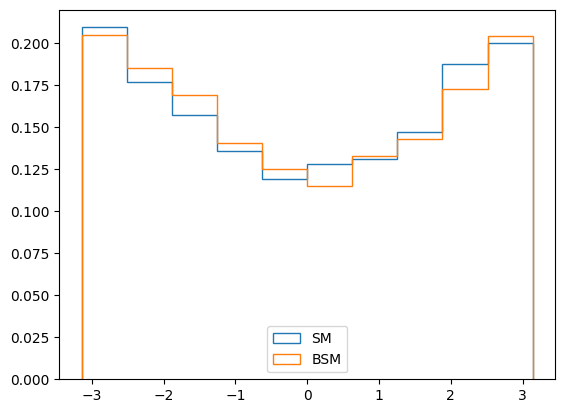

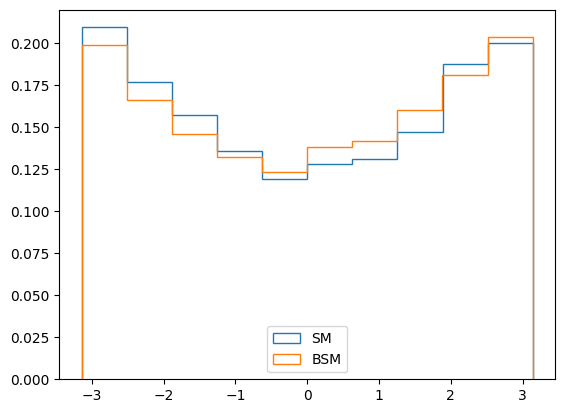

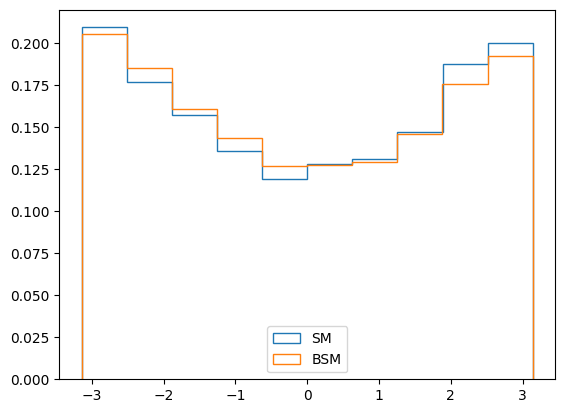

<Figure size 640x480 with 0 Axes>

In [19]:
for j in range(1,6):
    training = _load_samples(f"data/lhe_data_training_{j}_shuffled.h5")
    ys = training[2]
    mask = ys == 0
    xs = training[0]
    sm = xs[mask]
    bsm = xs[~mask]
    plt.hist(sm[:,2],density=True,histtype='step',label="SM")
    plt.hist(bsm[:,2],density=True,histtype='step',label="BSM")
    plt.legend()
    plt.show()
    plt.clf()

In [20]:
for j in range(1,6):
    ## Dumb rearrangement
    nn = MorphParameterizedRatioEstimator(n_hidden=(40,40),activation="tanh")
    training = _load_samples(f"data/lhe_data_training_{j}_shuffled.h5")
    ys = training[2]
    mask = ys > 0
    ys[mask] = 1
    loss = nn.train(
        method="carl",
        x=training[0],
        y=ys,
        n_epochs=40,
        )
    nn.save(f"alice_models/benchmark_model_{j}")

15:30 madminer.ml.paramete INFO    Starting training
15:30 madminer.ml.paramete INFO      Method:                 carl
15:30 madminer.ml.paramete INFO      Batch size:             128
15:30 madminer.ml.paramete INFO      Optimizer:              amsgrad
15:30 madminer.ml.paramete INFO      Epochs:                 40
15:30 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
15:30 madminer.ml.paramete INFO      Validation split:       0.25
15:30 madminer.ml.paramete INFO      Early stopping:         True
15:30 madminer.ml.paramete INFO      Scale inputs:           True
15:30 madminer.ml.paramete INFO      Scale parameters:       True
15:30 madminer.ml.paramete INFO      Shuffle labels          False
15:30 madminer.ml.paramete INFO      Samples:                all
15:30 madminer.ml.paramete INFO    Loading training data
15:30 madminer.ml.paramete INFO    Found 20000 samples with 3 observables
15:30 madminer.ml.base     INFO    Setting up input rescali

In [4]:
miner = MadMiner()
miner.load("data/ratio_setup.h5")

17:42 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
17:42 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
17:42 madminer.utils.inter INFO    HDF5 file does not contain observables information
17:42 madminer.utils.inter INFO    HDF5 file does not contain sample summary information
17:42 madminer.utils.inter INFO    HDF5 file does not contain sample information
17:42 madminer.utils.inter INFO    HDF5 file does not contain systematic information
17:42 madminer.core.madmin INFO    Found 2 parameters:
17:42 madminer.core.madmin INFO       CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
17:42 madminer.core.madmin INFO       CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
17:42 madminer.core.madmin INFO    Found 6 benchmarks:
17:42 madminer.core.madmin INFO       SM: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
17:42 madminer.core.madmin INFO       morphing_basis_vector_1: CWL2 = 1.27, CPWL2 = 0.07
17:42 madminer.core.madmi

In [5]:
miner.morpher.reduced_cs

array([0.96961806, 1.03452932, 1.01572145, 1.01929012, 0.9767554 ])

In [7]:
miner.morpher.basis

array([[ 0.        ,  0.        ],
       [ 1.27226592,  0.06824573],
       [ 0.63514479, -1.28850727],
       [ 0.50501063,  1.31278306],
       [-1.35745378, -1.14972351],
       [-1.41844899,  1.06373048]])

In [8]:
miner.benchmarks

OrderedDict([('SM',
              Benchmark(name='SM', values=OrderedDict([('CWL2', 0.0), ('CPWL2', 0.0)]), is_nuisance=False, is_reference=False)),
             ('morphing_basis_vector_1',
              Benchmark(name='morphing_basis_vector_1', values=OrderedDict([('CWL2', 1.2722659158722878), ('CPWL2', 0.06824573110056396)]), is_nuisance=False, is_reference=False)),
             ('morphing_basis_vector_2',
              Benchmark(name='morphing_basis_vector_2', values=OrderedDict([('CWL2', 0.6351447882222803), ('CPWL2', -1.2885072670967523)]), is_nuisance=False, is_reference=False)),
             ('morphing_basis_vector_3',
              Benchmark(name='morphing_basis_vector_3', values=OrderedDict([('CWL2', 0.5050106272024178), ('CPWL2', 1.3127830596303283)]), is_nuisance=False, is_reference=False)),
             ('morphing_basis_vector_4',
              Benchmark(name='morphing_basis_vector_4', values=OrderedDict([('CWL2', -1.3574537818721983), ('CPWL2', -1.1497235073184953)]), is_n

In [9]:
import numpy as np
def weight_vec(theta):
    return np.asarray([1,theta,theta**2])
def matrix(basis):
    m = []
    for elem in basis:
        m.append(weight_vec(elem))
    return m
def cond(basis):
    return np.linalg.cond(matrix(basis))

In [10]:
for j in range(10):
    basis = np.random.uniform(-1,1,3)
    print(np.linalg.cond(matrix(basis)))

10.14915361275347
5.952576227004423
13.307163162931046
9.753643222712414
28.073266160374178
36.65355939922439
16.085237758953266
35.837895137797496
24.380968656002164
7.922894365090115


In [17]:
import scipy
scipy.optimize.minimize(cond, np.random.uniform(-1,1,3))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.1462643699446664
        x: [-6.777e-07  1.107e+00 -1.107e+00]
      nit: 10
      jac: [-3.576e-06 -3.487e-06  2.176e-06]
 hess_inv: [[ 1.793e-01  5.887e-02  4.537e-02]
            [ 5.887e-02  1.461e-01 -2.766e-02]
            [ 4.537e-02 -2.766e-02  1.342e-01]]
     nfev: 56
     njev: 14